In [1]:
import xenaPython as xena  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Which features are most important in predicting cancer types

In [2]:
# update 1, 
# use link which has gtx so we can compare between tumor and non tumor.
# follow the documentation to get even more info for filtering.
# Testies and Ovaries still seem possible, might also be able to combine further. 

# thoughts : try to use the filtering to get all the rows I need and take them from the required datasets i.e :
# Once I have them, combine them in some way to see how the data splits it
# will I need to combine rows? or have double rows?

In [3]:
# update 2
# I have a way of getting the data, i just need to put it into a useable from see 'transponse with np array'
# below is the data url 
# # https://xenabrowser.net/datapages/?dataset=TCGA-GTEx-TARGET-gene-exp-counts.deseq2-normalized.log2&host=https%3A%2F%2Ftoil.xenahubs.net&addHub=https%3A%2F%2Ftreehouse.xenahubs.net&removeHub=https%3A%2F%2Fxena.treehouse.gi.ucsc.edu%3A443

In [4]:
# Questions?
# Do I need to combine multiple data sets from different types of cancers but make sure they have the same columns?
# How would that even work?


In [5]:
# help(xena) Quite useful function 

# Kidney Cancer

In [1]:
# 0 = normal
# 1 = chromophobe
# 2 = clear cell carcinoma 
# 3 = papillary 

In [10]:
df_kid =  pd.read_csv('kidney_info.csv')
df_kid = df_kid.rename(columns = {'TCGA_GTEX_main_category': 'target'})
df_kid.head()

,sample,samples,_study,_sample_type,_primary_site,target
0,TCGA-A3-3358-11,TCGA-A3-3358-11,TCGA,Solid Tissue Normal,Kidney,0
1,TCGA-A3-3387-11,TCGA-A3-3387-11,TCGA,Solid Tissue Normal,Kidney,0
2,TCGA-A4-A4ZT-11,TCGA-A4-A4ZT-11,TCGA,Solid Tissue Normal,Kidney,0
3,TCGA-A4-A57E-11,TCGA-A4-A57E-11,TCGA,Solid Tissue Normal,Kidney,0
4,TCGA-B0-4700-11,TCGA-B0-4700-11,TCGA,Solid Tissue Normal,Kidney,0


In [11]:
kidney_samples = list(df_kid['sample']) # get a list of all the samples 

In [ ]:
targets = list(df_kid['target'])
count0 = 0
count1 = 0
count2 = 0
count3 = 0
for i in range(len(targets)):
    if targets[i] == 0:
        count0 += 1
    if targets[i] == 1:
        count1 += 1
    if targets[i] == 2:
        count2 += 1
    if targets[i] == 3:
        count3 += 1
    
print(count0,count1,count2,count3)

In [27]:
# so what I need to do now is get the ENSG data from the website using the sample list

In [33]:
cohort = 'TCGA TARGET GTEx'
host = xena.PUBLIC_HUBS['toilHub']

# This should remain the same for all investigations

dataset_name = 'TCGA-GTEx-TARGET-gene-exp-counts.deseq2-normalized.log2' # will need to change for NORM_COUNT
# very big dataset 

In [34]:
text_file = open("all_probes_expected.txt", "r")
lines = text_file.read().split('\n')
text_file.close()
kidney_probes = lines

In [296]:
def xena_fetch_to_nparray(host, dataset_name, samples, probes,k):
    list_of_arrays = []
    for i in range(k): # 61 for kidney
        array = np.array(xena.dataset_fetch(host, dataset_name, samples, probes[i*1000:(i+1)*1000] ) )
        list_of_arrays += [array]
    return list_of_arrays      

In [83]:
new_a = np.concatenate((arrays[0], arrays[1]), axis=0)
for i in range(2, len(arrays)): 
    new_a = np.concatenate((new_a ,   arrays[i]))
new_a = np.vstack([new_a,kidney_target])

In [85]:
new_a = new_a.T # transpose so now it makes sense as a dataframe
df_kidney = pd.DataFrame(new_a)
df_kidney.columns = kidney_probes + ['Target'] # give the columns names
df_kidney.head()

# df_testicular = pd.read_csv('df_testicular.csv')

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,ENSG00000001167.14,...,ENSGR0000264510.5,ENSGR0000264819.5,ENSGR0000265658.5,ENSGR0000270726.5,ENSGR0000275287.4,ENSGR0000276543.4,ENSGR0000277120.4,ENSGR0000280767.2,ENSGR0000281849.2,Target
0,11.85,4.263,9.846,9.279,6.644,7.561,9.849,11.49,10.560,9.167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.99,5.745,9.317,8.845,5.612,7.028,10.280,11.36,10.720,9.005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12.41,4.251,9.633,9.339,6.641,7.457,9.197,11.52,9.333,9.694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.15,6.136,9.937,9.241,6.917,8.537,10.760,11.21,9.552,9.133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.26,5.073,9.477,9.253,6.484,6.902,11.520,11.27,10.480,9.353,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
# get rid of useless columns .. 

In [88]:
to_drop = []
i = 0
for column in df_kidney.columns:
    if max(df_kidney[column]) == 0: # min(df_testicular[column]) == 
        to_drop += [column]
#         print(column)
        i +=1
print(i)
df_kidney = df_kidney.drop(to_drop, axis=1);
df_kidney.head()

6701


,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,ENSG00000001167.14,...,ENSG00000282785.1,ENSG00000282787.1,ENSG00000282793.1,ENSG00000282795.1,ENSG00000282798.1,ENSG00000282804.1,ENSG00000282807.1,ENSG00000282815.1,ENSG00000282816.1,Target
0,11.85,4.263,9.846,9.279,6.644,7.561,9.849,11.49,10.560,9.167,...,0.0,0.0000,0.0,0.0,1.968,0.0,0.000,0.0000,0.0,0.0
1,10.99,5.745,9.317,8.845,5.612,7.028,10.280,11.36,10.720,9.005,...,0.0,0.6703,0.0,0.0,2.519,0.0,0.000,0.0000,0.0,0.0
2,12.41,4.251,9.633,9.339,6.641,7.457,9.197,11.52,9.333,9.694,...,0.0,2.5230,0.0,0.0,3.517,0.0,1.536,0.9633,0.0,0.0
3,12.15,6.136,9.937,9.241,6.917,8.537,10.760,11.21,9.552,9.133,...,0.0,0.9929,0.0,0.0,0.000,0.0,0.000,0.0000,0.0,0.0
4,11.26,5.073,9.477,9.253,6.484,6.902,11.520,11.27,10.480,9.353,...,0.0,0.8947,0.0,0.0,3.262,0.0,0.000,0.0000,0.0,0.0


### Now the Machine learning can begin ..

Summary: 

I want to get some features for the decsion tree and save the image

then do another classification ML task and see if the same features appear

Then attempt H.clustering and do some analysis there - can I get the features from this?

In [3]:
# df_kidney.to_csv('df_kidney_read.csv') # doesnt need repeating
df_kidney =  pd.read_csv('df_kidney_read.csv') # do this every start up

In [14]:
del df_kidney['Unnamed: 0']
df_kidney.head()

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,ENSG00000001167.14,...,ENSG00000282785.1,ENSG00000282787.1,ENSG00000282793.1,ENSG00000282795.1,ENSG00000282798.1,ENSG00000282804.1,ENSG00000282807.1,ENSG00000282815.1,ENSG00000282816.1,Target
0,11.85,4.263,9.846,9.279,6.644,7.561,9.849,11.49,10.560,9.167,...,0.0,0.0000,0.0,0.0,1.968,0.0,0.000,0.0000,0.0,0.0
1,10.99,5.745,9.317,8.845,5.612,7.028,10.280,11.36,10.720,9.005,...,0.0,0.6703,0.0,0.0,2.519,0.0,0.000,0.0000,0.0,0.0
2,12.41,4.251,9.633,9.339,6.641,7.457,9.197,11.52,9.333,9.694,...,0.0,2.5230,0.0,0.0,3.517,0.0,1.536,0.9633,0.0,0.0
3,12.15,6.136,9.937,9.241,6.917,8.537,10.760,11.21,9.552,9.133,...,0.0,0.9929,0.0,0.0,0.000,0.0,0.000,0.0000,0.0,0.0
4,11.26,5.073,9.477,9.253,6.484,6.902,11.520,11.27,10.480,9.353,...,0.0,0.8947,0.0,0.0,3.262,0.0,0.000,0.0000,0.0,0.0


In [15]:
# 0 = normal
# 1 = chromophobe
# 2 = clear cell carcinoma 
# 3 = papillary 

In [16]:
normal_kidney_df = (df_kidney.loc[df_kidney['Target'] == 0])
chrome_kidney_df = (df_kidney.loc[df_kidney['Target'] == 1])
clearc_kidney_df = (df_kidney.loc[df_kidney['Target'] == 2])
papill_kidney_df = (df_kidney.loc[df_kidney['Target'] == 3])


In [17]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#### Normal vs Chrome

In [18]:
df_norm_chrome = pd.concat([normal_kidney_df, chrome_kidney_df])
df_norm_chrome.head()

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,ENSG00000001167.14,...,ENSG00000282785.1,ENSG00000282787.1,ENSG00000282793.1,ENSG00000282795.1,ENSG00000282798.1,ENSG00000282804.1,ENSG00000282807.1,ENSG00000282815.1,ENSG00000282816.1,Target
0,11.85,4.263,9.846,9.279,6.644,7.561,9.849,11.49,10.560,9.167,...,0.0,0.0000,0.0,0.0,1.968,0.0,0.000,0.0000,0.0,0.0
1,10.99,5.745,9.317,8.845,5.612,7.028,10.280,11.36,10.720,9.005,...,0.0,0.6703,0.0,0.0,2.519,0.0,0.000,0.0000,0.0,0.0
2,12.41,4.251,9.633,9.339,6.641,7.457,9.197,11.52,9.333,9.694,...,0.0,2.5230,0.0,0.0,3.517,0.0,1.536,0.9633,0.0,0.0
3,12.15,6.136,9.937,9.241,6.917,8.537,10.760,11.21,9.552,9.133,...,0.0,0.9929,0.0,0.0,0.000,0.0,0.000,0.0000,0.0,0.0
4,11.26,5.073,9.477,9.253,6.484,6.902,11.520,11.27,10.480,9.353,...,0.0,0.8947,0.0,0.0,3.262,0.0,0.000,0.0000,0.0,0.0


In [19]:
features = list(df_norm_chrome.columns[:-1])
y = df_norm_chrome["Target"]
X = df_norm_chrome[features]

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
features = list(df_norm_chrome.columns[:-1])
y = df_norm_chrome["Target"]
X = df_norm_chrome[features]


In [57]:
dt = RandomForestClassifier(n_estimators=200) # min_samples_split=5, random_state=99
# dt = DecisionTreeClassifier() # min_samples_split=5, random_state=99
dt.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

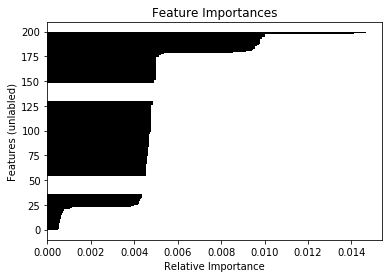

In [69]:
f_importance = dt.feature_importances_
indices = np.argsort(f_importance)[-200:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), f_importance[indices], color='black', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.ylabel('Features (unlabled)')
plt.xlabel('Relative Importance')
plt.show()
# plt.figure(figsize=(8, 6))

Clearly only very few seem important, probably around 15. Point out the top 1 and see what it does... These features are :

In [ ]:
indices = np.argsort(f_importance)[-40:]
important_feature_norm_chrome = [features[i] for i in indices]
print(important_feature_norm_chrome)

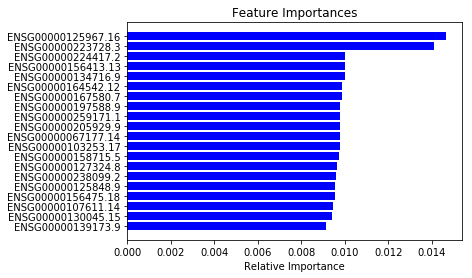

In [60]:
f_importance = dt.feature_importances_
indices = np.argsort(f_importance)[-20:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), f_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Here we can see a clear divide. Whereas the lower ranking results blend quite well (maybe show both).

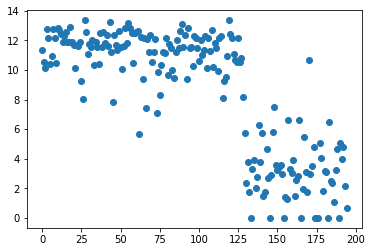

In [61]:
plt.scatter(range(len(df_norm_chrome)),df_norm_chrome['ENSG00000113946.3'])

#### Normal vs Clear Cell

In [70]:
df_norm_clearc = pd.concat([normal_kidney_df, clearc_kidney_df])
df_norm_clearc.tail()

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,ENSG00000001167.14,...,ENSG00000282785.1,ENSG00000282787.1,ENSG00000282793.1,ENSG00000282795.1,ENSG00000282798.1,ENSG00000282804.1,ENSG00000282807.1,ENSG00000282815.1,ENSG00000282816.1,Target
720,11.01,4.6090,10.54,10.020,8.722,11.580,13.100,11.89,10.830,10.16,...,0.0,0.000,2.506,0.0,0.000,1.356,2.856,0.000,0.0,2.0
721,11.29,2.9250,10.56,9.743,8.590,10.570,11.690,12.01,10.540,10.34,...,0.0,3.445,0.000,0.0,2.572,1.405,2.104,5.283,0.0,2.0
722,11.27,2.9370,10.38,9.647,8.256,10.300,13.510,12.77,9.975,10.62,...,0.0,3.840,2.584,0.0,1.414,0.000,0.000,1.414,0.0,2.0
723,11.63,3.2960,10.88,9.724,7.733,9.610,10.330,11.78,11.260,10.54,...,0.0,3.124,2.436,0.0,3.449,0.000,0.000,1.072,0.0,2.0
724,10.71,0.6474,9.68,9.267,7.368,8.201,7.977,13.13,10.610,10.28,...,0.0,2.736,0.000,0.0,3.624,0.000,0.000,0.000,0.0,2.0


In [71]:
features = list(df_norm_clearc.columns[:-1])
y = df_norm_clearc["Target"]
X = df_norm_clearc[features]
    

In [72]:
dt = RandomForestClassifier(n_estimators=200) # min_samples_split=5, random_state=99
# dt = DecisionTreeClassifier() # min_samples_split=5, random_state=99
dt.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

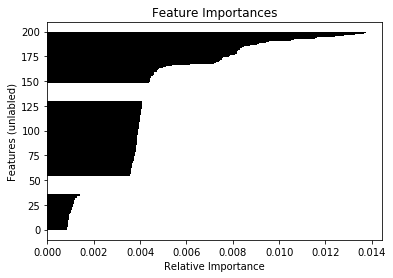

In [73]:
f_importance = dt.feature_importances_
indices = np.argsort(f_importance)[-200:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), f_importance[indices], color='black', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.ylabel('Features (unlabled)')
plt.xlabel('Relative Importance')
plt.show()

Again, top 15 seem to hold most of the weighting, possibly top 40. 

In [ ]:
indices = np.argsort(f_importance)[-40:]
important_feature_norm_clear = [features[i] for i in indices]
print(important_feature_norm_clear)

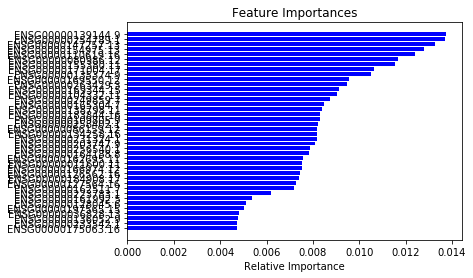

In [75]:
f_importance = dt.feature_importances_
indices = np.argsort(f_importance)[-40:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), f_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Normal vs Papill

In [76]:
df_norm_papill = pd.concat([normal_kidney_df, papill_kidney_df])
df_norm_papill.tail()

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,ENSG00000001167.14,...,ENSG00000282785.1,ENSG00000282787.1,ENSG00000282793.1,ENSG00000282795.1,ENSG00000282798.1,ENSG00000282804.1,ENSG00000282807.1,ENSG00000282815.1,ENSG00000282816.1,Target
1008,11.15,2.4700,9.795,9.050,7.088,10.750,13.040,12.30,11.09,9.325,...,0.0,2.139,0.0,0.000,0.000,0.0,1.709,0.00,0.0,3.0
1009,11.07,0.8560,9.356,9.224,7.485,10.630,12.870,12.26,11.15,10.250,...,0.0,2.551,0.0,0.856,4.990,0.0,0.000,1.39,0.0,3.0
1010,10.60,0.7464,9.460,8.127,6.583,8.637,7.772,11.99,11.13,9.385,...,0.0,0.000,0.0,0.000,2.828,0.0,0.000,0.00,0.0,3.0
1011,11.11,2.3920,10.170,9.460,7.405,7.926,13.470,11.65,10.65,10.170,...,0.0,2.183,0.0,0.000,4.170,0.0,0.000,0.00,0.0,3.0
1012,11.39,0.0000,9.991,8.273,6.892,11.940,10.160,13.72,11.61,9.010,...,0.0,2.498,0.0,0.000,0.000,0.0,0.000,0.00,0.0,3.0


In [77]:
features = list(df_norm_clearc.columns[:-1])
y = df_norm_papill["Target"]
X = df_norm_papill[features]

In [78]:
dt = RandomForestClassifier(n_estimators=200) # min_samples_split=5, random_state=99
# dt = DecisionTreeClassifier() # min_samples_split=5, random_state=99
dt.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

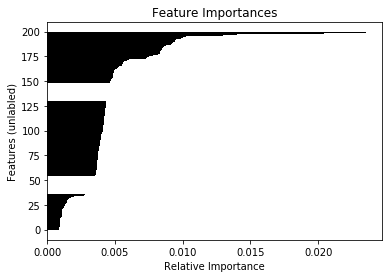

In [79]:
f_importance = dt.feature_importances_
indices = np.argsort(f_importance)[-200:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), f_importance[indices], color='black', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.ylabel('Features (unlabled)')
plt.xlabel('Relative Importance')
plt.show()

Again, top 15 seem to hold most of the weighting, possibly top 40. 

In [ ]:
indices = np.argsort(f_importance)[-40:]
important_feature_norm_papill = [features[i] for i in indices]
print(important_feature_norm_papill)

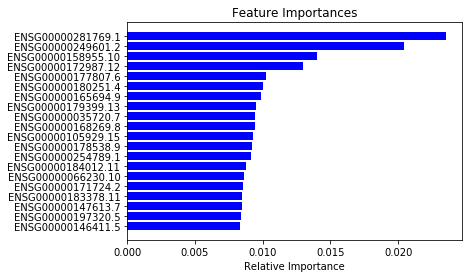

In [81]:
f_importance = dt.feature_importances_
indices = np.argsort(f_importance)[-20:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), f_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Check what features they have in common

In [82]:
a= important_feature_norm_chrome
b= important_feature_norm_clear
c= important_feature_norm_papill

In [100]:
a[-1], a[-2], a[-3]

('ENSG00000125967.16', 'ENSG00000223728.3', 'ENSG00000224417.2')

In [101]:
b[-1], b[-2], b[-3]

('ENSG00000139144.9', 'ENSG00000254789.1', 'ENSG00000147257.13')

In [99]:
c[-1], c[-2], c[-3]

('ENSG00000281769.1', 'ENSG00000249601.2', 'ENSG00000158955.10')

In [84]:
set(b).intersection(c)

{'ENSG00000128045.6', 'ENSG00000254789.1'}

In [85]:
set(b).intersection(a)

set()

In [86]:
set(c).intersection(a)

{'ENSG00000066230.10', 'ENSG00000167580.7'}

Only Clear and papill have features in common. 

Try using a binary classifer to get the most important features and try again to see if we get the same results

In [92]:
print(a.index('ENSG00000167580.7'), c.index('ENSG00000167580.7'))
print(a.index('ENSG00000066230.10'), c.index('ENSG00000066230.10'))

33 5
17 25


In [94]:
print(b.index('ENSG00000128045.6'), c.index('ENSG00000128045.6'))
print(b.index('ENSG00000254789.1'), c.index('ENSG00000254789.1'))


5 4
38 27


#### All combined

In [102]:
features = list(df_kidney.columns[:-1])
y = df_kidney["Target"]
X = df_kidney[features]

In [103]:
dt = RandomForestClassifier(n_estimators=200)
# dt = DecisionTreeClassifier() # min_samples_split=5, random_state=99
dt.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

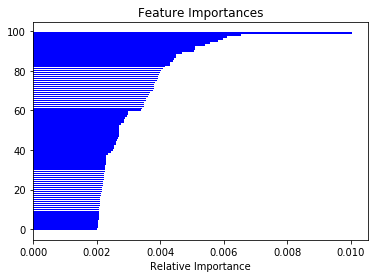

In [104]:
f_importance = dt.feature_importances_
indices = np.argsort(f_importance)[-100:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), f_importance[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [105]:
indices = np.argsort(f_importance)[-15:] 
feature_rank_all = [features[i] for i in indices]
print(feature_rank_all)

['ENSG00000143603.18', 'ENSG00000147113.16', 'ENSG00000161381.13', 'ENSG00000081189.13', 'ENSG00000187730.7', 'ENSG00000129521.13', 'ENSG00000177464.4', 'ENSG00000178202.12', 'ENSG00000256540.1', 'ENSG00000164434.11', 'ENSG00000163492.13', 'ENSG00000135245.9', 'ENSG00000253882.6', 'ENSG00000164342.12', 'ENSG00000128284.19']


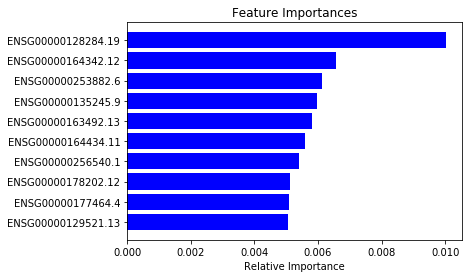

In [106]:
f_importance = dt.feature_importances_
indices = np.argsort(f_importance)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), f_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
joint = set(feature_rank).intersection(feature_rank1)
print(joint, len(joint))

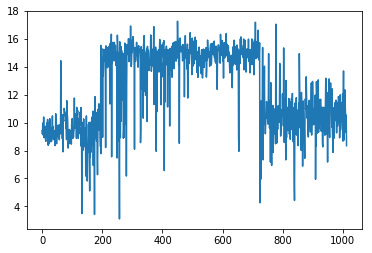

In [64]:
test = list(df_kidney[feature_rank[-1]])
print(feature_rank[-1])
plt.plot(test)


ENSG00000004939.13


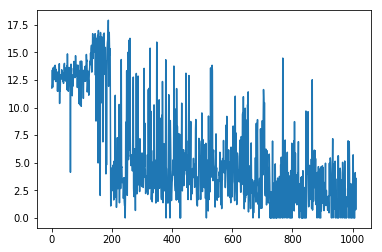

In [65]:
test = list(df_kidney[feature_rank[-2]])
print(feature_rank[-2])
plt.plot(test)

In [ ]:
test = list(df_kidney[feature_rank[-3]])
print(feature_rank[-3])
plt.plot(test)

In [108]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")


In [109]:
# dt = RandomForestClassifier(n_estimators=200)
dt_all = DecisionTreeClassifier() # min_samples_split=5, random_state=99
dt_all.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [110]:
visualize_tree(dt_all, features)

Are the top features in descision tree the same ones that found in random forest?

In [111]:
f_importance = dt_all.feature_importances_
indices = np.argsort(f_importance)[-15:] 
feature_rank_all_at = [features[i] for i in indices]
print(feature_rank_all_at)

['ENSG00000074054.17', 'ENSG00000170348.8', 'ENSG00000273344.1', 'ENSG00000276664.1', 'ENSG00000242110.7', 'ENSG00000104375.15', 'ENSG00000099814.15', 'ENSG00000182168.14', 'ENSG00000186451.1', 'ENSG00000130234.10', 'ENSG00000236565.3', 'ENSG00000279473.1', 'ENSG00000225329.3', 'ENSG00000004939.13', 'ENSG00000129521.13']


In [112]:
set(feature_rank_all).intersection(feature_rank_all_at)

{'ENSG00000129521.13'}

ENSG00000129521.13 is the top branching at the top of the tree for both random forest and decsion tree

## Can a ML algorithm differentiate between clear and chrome?

In [2]:
from sklearn import linear_model

In [4]:
normal_kidney_df = (df_kidney.loc[df_kidney['Target'] == 0])
chrome_kidney_df = (df_kidney.loc[df_kidney['Target'] == 1])
clearc_kidney_df = (df_kidney.loc[df_kidney['Target'] == 2])
papill_kidney_df = (df_kidney.loc[df_kidney['Target'] == 3])

normal_train=normal_kidney_df.sample(frac=0.8,random_state=200)
normal_test=normal_kidney_df.drop(normal_train.index)

chrome_train=chrome_kidney_df.sample(frac=0.8,random_state=200)
chrome_test=chrome_kidney_df.drop(chrome_train.index)

clearc_train=clearc_kidney_df.sample(frac=0.8,random_state=200)
clearc_test=clearc_kidney_df.drop(clearc_train.index)

papill_train=papill_kidney_df.sample(frac=0.8,random_state=200)
papill_test=papill_kidney_df.drop(papill_train.index)

In [5]:
df_kid_train = pd.concat([normal_train, chrome_train, clearc_train, papill_train])
df_kid_test = pd.concat([normal_test, chrome_test, clearc_test, papill_test])

In [6]:
df_kid_train.head()

,Unnamed: 0,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,...,ENSG00000282785.1,ENSG00000282787.1,ENSG00000282793.1,ENSG00000282795.1,ENSG00000282798.1,ENSG00000282804.1,ENSG00000282807.1,ENSG00000282815.1,ENSG00000282816.1,Target
41,41,11.44,4.835,9.696,8.906,6.307,7.025,10.520,11.37,10.490,...,0.000,1.6870,0.000,3.2390,0.000,0.5302,0.000,0.0000,0.0,0.0
102,102,11.45,6.987,10.230,9.225,6.849,8.293,10.960,11.23,10.320,...,1.192,0.7156,0.000,0.0000,1.192,0.0000,0.000,0.0000,0.0,0.0
46,46,12.19,4.872,9.484,9.314,6.572,7.491,10.470,11.26,9.832,...,0.000,1.7300,0.000,0.5495,1.513,0.0000,0.000,0.0000,0.0,0.0
71,71,12.69,3.307,9.830,9.709,6.813,7.969,10.230,11.37,9.938,...,1.183,0.5097,0.000,0.5097,0.000,0.0000,0.000,0.5097,0.0,0.0
107,107,12.91,5.501,10.970,9.934,6.497,9.788,9.851,11.70,9.811,...,0.000,2.7300,1.384,1.3840,0.000,0.0000,0.852,0.0000,0.0,0.0


In [7]:
features = list(df_kid_train.columns[:-1])
y = df_kid_train["Target"]
X = df_kid_train[features]

In [8]:
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3, shuffle=True) # max_iter=1000, tol=1e-3
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
X_test = df_kid_test[features]
y_test = df_kid_test["Target"]

In [10]:
print('train score:' , clf.score(X,y) )
print('test score:', clf.score(X_test,y_test) ) # <- this is the right score

train score: 0.9950617283950617
test score: 0.9901477832512315


In [398]:
test_predict = list(clf.predict(X_test))
test_actual = list(y_test)

In [410]:
print(clf.score(normal_test[features],normal_test['Target']))
print(clf.score(chrome_test[features],chrome_test['Target']))
print(clf.score(clearc_test[features],clearc_test['Target']))
print(clf.score(papill_test[features],papill_test['Target']))

1.0
0.8461538461538461
0.9056603773584906
0.9827586206896551


In [406]:
score = 0
compare = []
for i, j in zip(test_actual, test_predict):
    if i == j:
        score +=1
        compare += [1]
    else:
        compare += [0]
print(score/len(test_actual))
print(compare)

0.9359605911330049
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


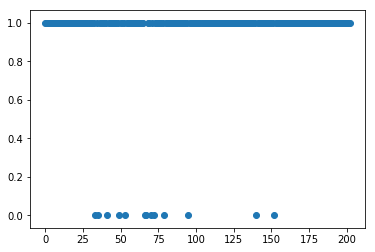

In [416]:
plt.scatter(range(len(compare)), compare) 

In [420]:
720*0.2


144.0

## Visualise Kidney Data

In [164]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [253]:
features = list(df_kidney.columns[:-1])
y = df_kidney["Target"]
X = df_kidney[features]
target_name = ['Normal','Chrome', 'Clear Cell', 'Papillary']

In [170]:
# lda = LinearDiscriminantAnalysis(n_components=2)
# X_r2 = lda.fit(X, y).transform(X)

C:\Users\User_E\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


<Figure size 432x288 with 0 Axes>

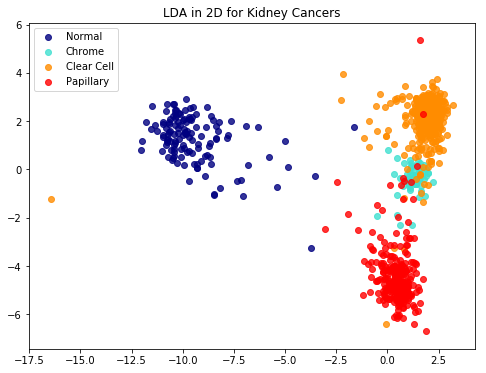

In [254]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'red']

plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1, 2,3], target_name):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA in 2D for Kidney Cancers')

plt.show()

See if it can cluster them into correct groups

In [212]:
from sklearn.cluster import KMeans

In [219]:
# # takes donkey years - do not run again
# change the names of this stuff so i dont have to re run the other shit
# Nc = range(1,6)

# kmeans = [KMeans(n_clusters=i) for i in Nc]

# kmeans

# score = [kmeans[i].fit(X_r2).score(X_r2) for i in range(len(kmeans))]

# score



[-23842.44455045311,
 -10011.983756169342,
 -1666.4848237070337,
 -1083.3192843226857,
 -912.1951431429658]

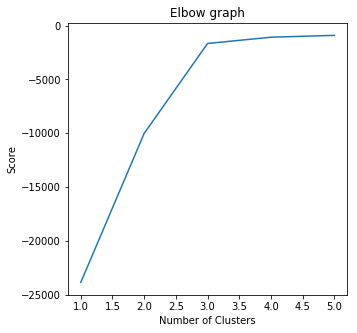

In [220]:
plt.figure(figsize=(5,5))
plt.plot(Nc[:],score[:])

plt.xlabel('Number of Clusters')
# plt.xticks([7,8,9,10,11])
plt.ylabel('Score')

plt.title('Elbow graph')
plt.show()

In [222]:
kmeans_new = KMeans(n_clusters=3).fit(X_r2)
clusters = kmeans_new.labels_.tolist()

In [223]:
# takes donkey years - do not run again

Nc = range(1,6)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

score



[-63389611.72344257,
 -53765568.54655956,
 -48747862.17671485,
 -45846137.41290659,
 -43910742.332323916]

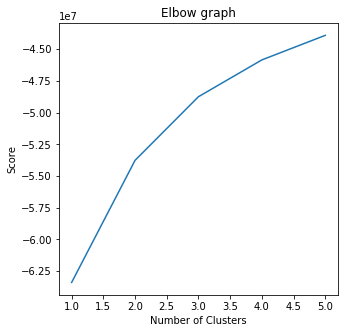

In [224]:
plt.figure(figsize=(5,5))
plt.plot(Nc[:],score[:])

plt.xlabel('Number of Clusters')
# plt.xticks([7,8,9,10,11])
plt.ylabel('Score')

plt.title('Elbow graph')
plt.show()

In [ ]:
# kmeans_new = KMeans(n_clusters=4).fit(X)
clusters = kmeans_new.labels_.tolist()
print(clusters)


In [241]:
clusters = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 0, 1, 1, 2, 1, 1, 1, 3, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
count = [clusters.count(0), clusters.count(3), clusters.count(1), clusters.count(2) ]
count


[137, 84, 512, 280]

In [236]:
[129, 66 , 530, 288]
[137, 84, 512, 280]

[137, 84, 512, 280]

In [ ]:
# seeing what happens when it groups as 3 
kmeans_new3 = KMeans(n_clusters=3).fit(X)
clusters3 = kmeans_new3.labels_.tolist()
print(clusters3)

In [243]:
count3 = [clusters3.count(0), clusters3.count(1), clusters3.count(2) ]
print(count3)

[220, 514, 279]


In [ ]:
clusters2

In [ ]:
kmeans_new2 = KMeans(n_clusters=2).fit(X)
clusters2 = kmeans_new2.labels_.tolist()
print(clusters2)


In [252]:
count2 = [clusters2.count(1), clusters2.count(0)]
print(count2)

[486, 527]


See which cancers it thinks belong where, can I plot all of these on the same graph?

## Comparing the clusters to see which clusters it gets right/wrong

In [5]:
print([129, 66 , 530, 288])
print([137, 84, 512, 280])

[129, 66, 530, 288]
[137, 84, 512, 280]


In [31]:
# k_clusters = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 0, 1, 1, 2, 1, 1, 1, 3, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
k_clusters = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 0, 1, 1, 2, 1, 1, 1, 3, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
a_clusters = [0]*129 + [3]*66 + [1]*530 + [2]*288
check = []
for i,j in zip(k_clusters, a_clusters):
    if i == j:
        check += [1]
    else:
        check += [0]

In [37]:
check.count(1)/1000

0.943

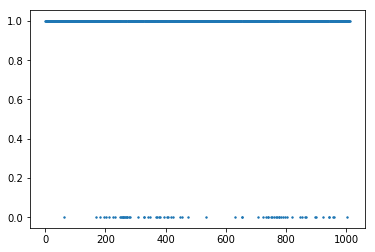

In [35]:
plt.scatter(range(len(check)),check, s = 2)

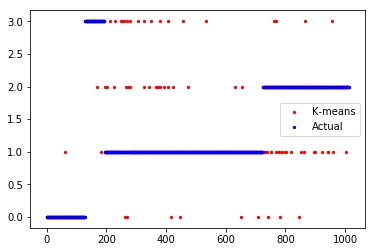

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

# can i change y labels to words?

plt.scatter(range(len(k_clusters)), k_clusters, s=5, c='r', marker="o", label='K-means')
plt.scatter(range(len(a_clusters)), a_clusters, s= 5, c='b', marker="o", label='Actual')

# ax1.scatter(x[:4], y[:4], s=10, c='b', marker="s", label='first')
# ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o", label='second')
plt.legend();
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

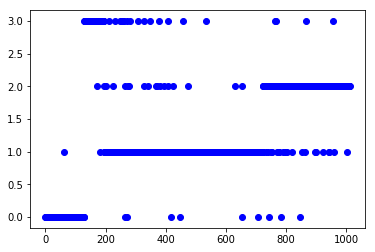

In [14]:



plt.scatter(range(len(a_clusters)), a_clusters, color='red')
plt.scatter(range(len(k_clusters)), k_clusters, color='blue')